# Image Classification: Car Body Style


This image classifier will attempt to accurately classify 8 types of car body styles. The dataset features 2000 images, 250 for each of the following 8 car body styles: **Convertible**, **Coupé**, **Hatchback**, **Minivan**, **Pickup**, **Sedan**, **SUV** and **Truck**.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

Create a new dataset called `Car Body Style` and upload the [car_body_style.zip](https://github.com/edkahara/fastai/blob/master/lesson%201/datasets/car_body_style.zip) file.

In [4]:
path = Path('../input/car_body_style/images')
path

PosixPath('../input/car_body_style/images')

In [5]:
path.ls()

[PosixPath('../input/car_body_style/images/test'),
 PosixPath('../input/car_body_style/images/train')]

In [6]:
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.3, ds_tfms=get_transforms(), size=224, bs=bs, num_workers=0).normalize(imagenet_stats)

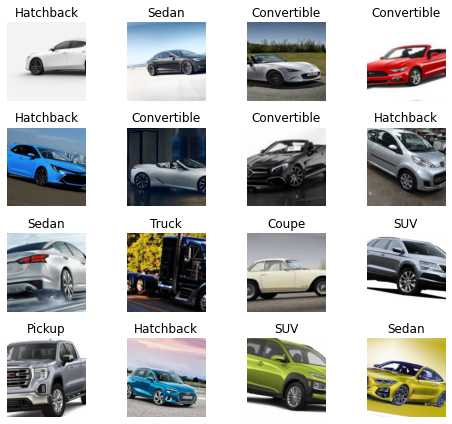

In [7]:
data.show_batch(rows=4, figsize=(7,6))

In [8]:
print(data.classes)
len(data.classes),data.c

['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV', 'Sedan', 'Truck']


(8, 8)

# Training: resnet34

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.651288,1.250396,0.435417,00:24
1,2.056639,1.249935,0.410417,00:22
2,1.655238,1.178393,0.385417,00:22
3,1.457685,1.129539,0.381250,00:22


In [11]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

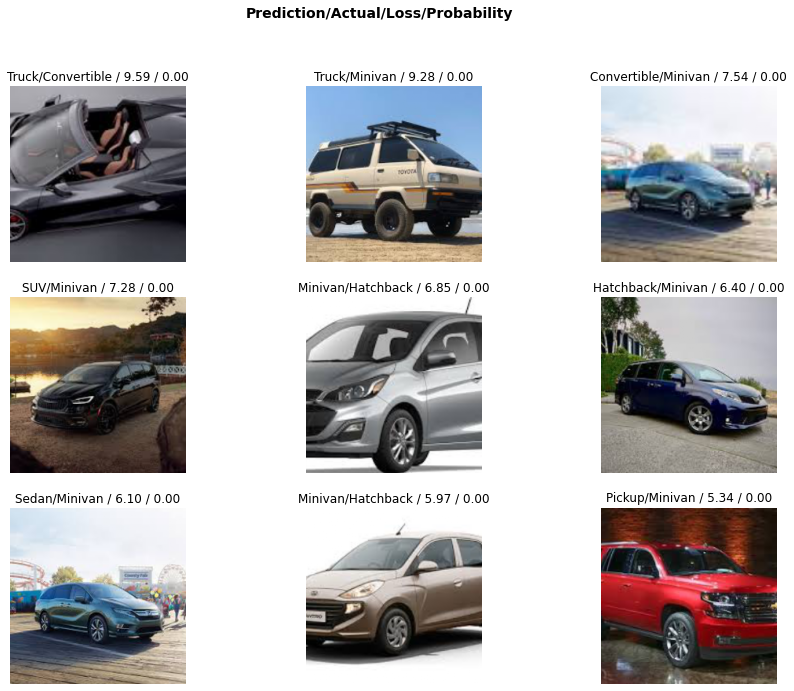

In [12]:
interp.plot_top_losses(9, figsize=(15,11))

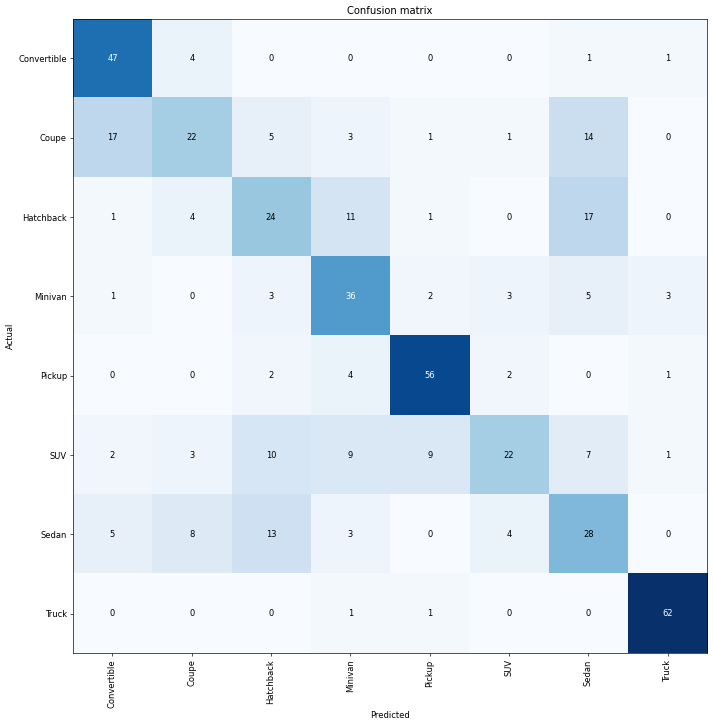

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
interp.most_confused(min_val=2)

[('Coupe', 'Convertible', 17),
 ('Hatchback', 'Sedan', 17),
 ('Coupe', 'Sedan', 14),
 ('Sedan', 'Hatchback', 13),
 ('Hatchback', 'Minivan', 11),
 ('SUV', 'Hatchback', 10),
 ('SUV', 'Minivan', 9),
 ('SUV', 'Pickup', 9),
 ('Sedan', 'Coupe', 8),
 ('SUV', 'Sedan', 7),
 ('Coupe', 'Hatchback', 5),
 ('Minivan', 'Sedan', 5),
 ('Sedan', 'Convertible', 5),
 ('Convertible', 'Coupe', 4),
 ('Hatchback', 'Coupe', 4),
 ('Pickup', 'Minivan', 4),
 ('Sedan', 'SUV', 4),
 ('Coupe', 'Minivan', 3),
 ('Minivan', 'Hatchback', 3),
 ('Minivan', 'SUV', 3),
 ('Minivan', 'Truck', 3),
 ('SUV', 'Coupe', 3),
 ('Sedan', 'Minivan', 3),
 ('Minivan', 'Pickup', 2),
 ('Pickup', 'Hatchback', 2),
 ('Pickup', 'SUV', 2),
 ('SUV', 'Convertible', 2)]

In [15]:
learn.model_dir='/kaggle/working/'

In [16]:
learn.save('resnet34-1')

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


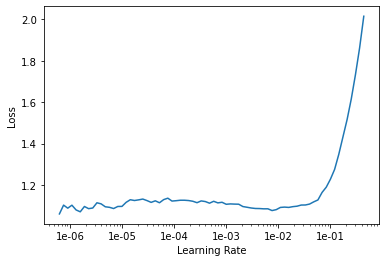

In [18]:
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.463882,1.710309,0.433333,00:23
1,1.293033,1.082994,0.372917,00:23


# Training: resnet50

In [20]:
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.3, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2, num_workers=0).normalize(imagenet_stats)

In [21]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [22]:
learn.model_dir='/kaggle/working/'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


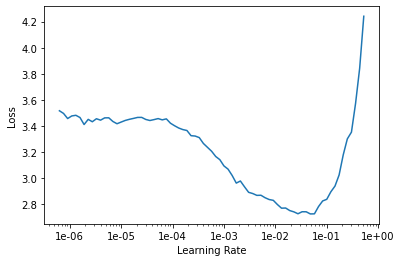

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.433941,1.420723,0.410417,00:40
1,1.889041,1.549507,0.425000,00:40
2,1.596207,1.207608,0.412500,00:40
3,1.321087,1.146828,0.368750,00:40
4,1.088458,1.061051,0.358333,00:40
5,0.887544,1.038243,0.368750,00:40
6,0.769534,1.056763,0.354167,00:39
7,0.688969,1.040756,0.341667,00:40


In [25]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

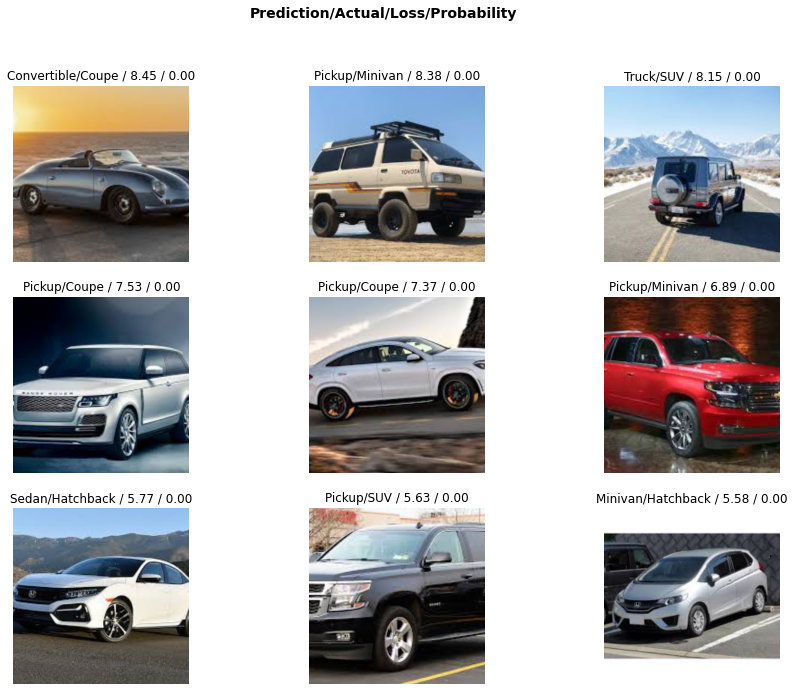

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

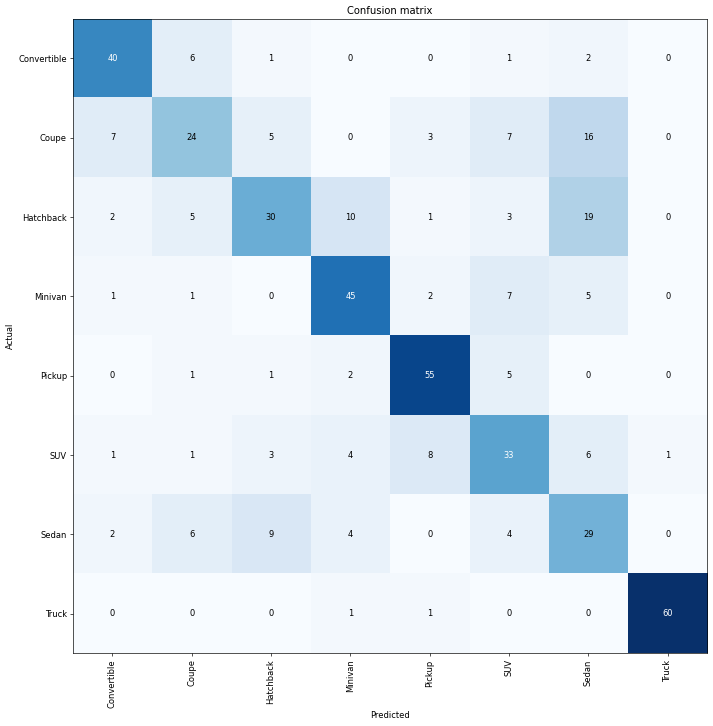

In [27]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [28]:
interp.most_confused(min_val=2)

[('Hatchback', 'Sedan', 19),
 ('Coupe', 'Sedan', 16),
 ('Hatchback', 'Minivan', 10),
 ('Sedan', 'Hatchback', 9),
 ('SUV', 'Pickup', 8),
 ('Coupe', 'Convertible', 7),
 ('Coupe', 'SUV', 7),
 ('Minivan', 'SUV', 7),
 ('Convertible', 'Coupe', 6),
 ('SUV', 'Sedan', 6),
 ('Sedan', 'Coupe', 6),
 ('Coupe', 'Hatchback', 5),
 ('Hatchback', 'Coupe', 5),
 ('Minivan', 'Sedan', 5),
 ('Pickup', 'SUV', 5),
 ('SUV', 'Minivan', 4),
 ('Sedan', 'Minivan', 4),
 ('Sedan', 'SUV', 4),
 ('Coupe', 'Pickup', 3),
 ('Hatchback', 'SUV', 3),
 ('SUV', 'Hatchback', 3),
 ('Convertible', 'Sedan', 2),
 ('Hatchback', 'Convertible', 2),
 ('Minivan', 'Pickup', 2),
 ('Pickup', 'Minivan', 2),
 ('Sedan', 'Convertible', 2)]

In [29]:
learn.save('resnet50-1')

In [31]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.767781,1.398773,0.362500,00:42
1,0.972133,1.455186,0.345833,00:42
2,0.743982,1.046862,0.306250,00:43
